In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Exploring Data for Analysis

In [3]:
trainds = pd.read_csv("/kaggle/input/titanic/train.csv")
trainds.head() #prints out the first 5 parts of data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
testds = pd.read_csv("/kaggle/input/titanic/test.csv")
testds.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
trainds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Total number of entries in train dataset is 891. Age, Cabin and Embarked attributes do not have complete parameters in the dataset. 
Categorical arrtibutes include: Sex, Name, Cabin and Embarked. we will focus on name, Cabin and Embarked


Checking parameters for the categorical attribute

In [6]:
trainds['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [7]:
trainds['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
trainds['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

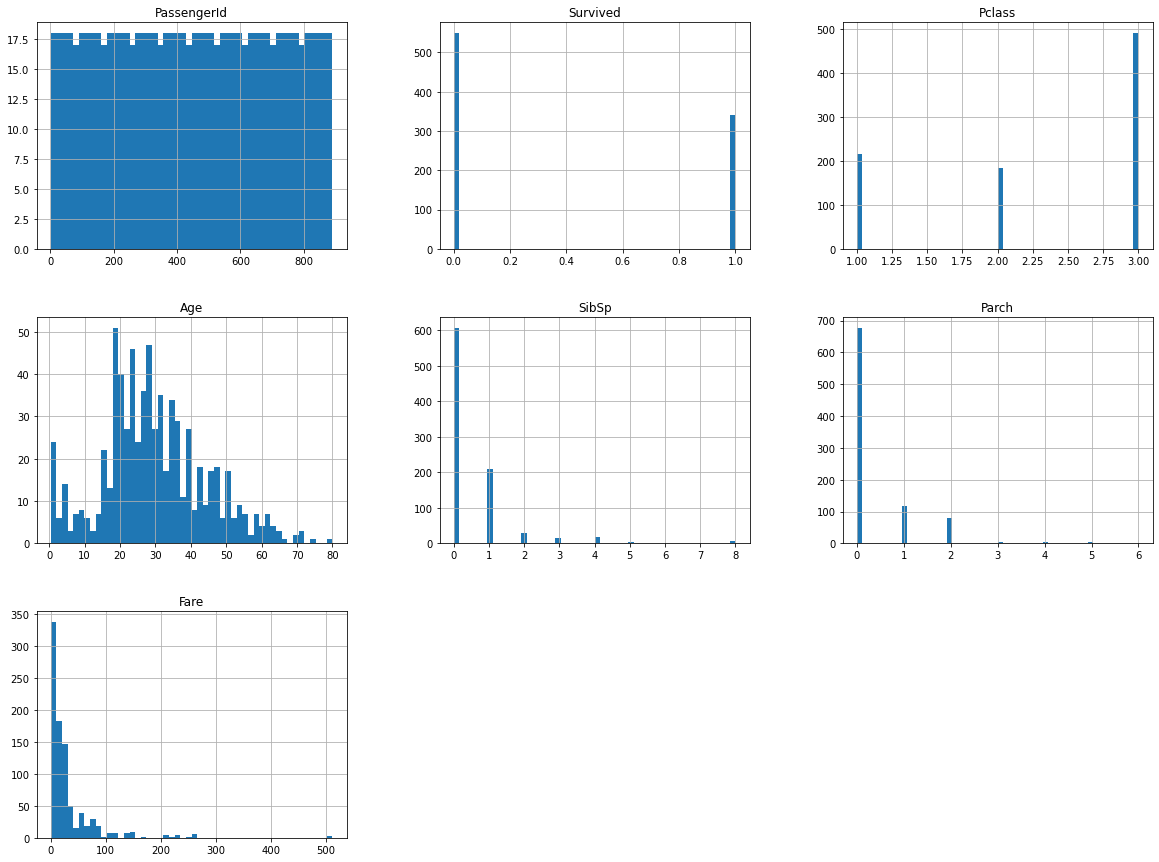

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
trainds.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
train_ds= trainds.copy()

In [11]:
train_ds['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [12]:
train_ds['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [13]:
train_ds['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [14]:
train_ds.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
corr_matrix = train_ds.corr()


In [16]:
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

Checking which categorical attribute contribute to survivor chances:

In [17]:
women = train_ds.loc[train_ds.Sex == 'female']['Survived']
rate_women = sum(women)/len(women)

print("% of women who survied:", rate_women)

% of women who survied: 0.7420382165605095


In [18]:
men = train_ds.loc[train_ds.Sex == 'male']['Survived']
rate_men = sum(men)/len(men)

print("% of men who survied:", rate_men)

% of men who survied: 0.18890814558058924


Plotting graphs to view what categorical attributes contributes to surviving

array([[<AxesSubplot:xlabel='Survived', ylabel='Survived'>,
        <AxesSubplot:xlabel='Age', ylabel='Survived'>,
        <AxesSubplot:xlabel='Parch', ylabel='Survived'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Survived'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Survived'>,
        <AxesSubplot:xlabel='Fare', ylabel='Survived'>,
        <AxesSubplot:xlabel='PassengerId', ylabel='Survived'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Parch', ylabel='Age'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Age'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Age'>,
        <AxesSubplot:xlabel='Fare', ylabel='Age'>,
        <AxesSubplot:xlabel='PassengerId', ylabel='Age'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Parch'>,
        <AxesSubplot:xlabel='Age', ylabel='Parch'>,
        <AxesSubplot:xlabel='Parch', ylabel='Parch'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Parch'>,
   

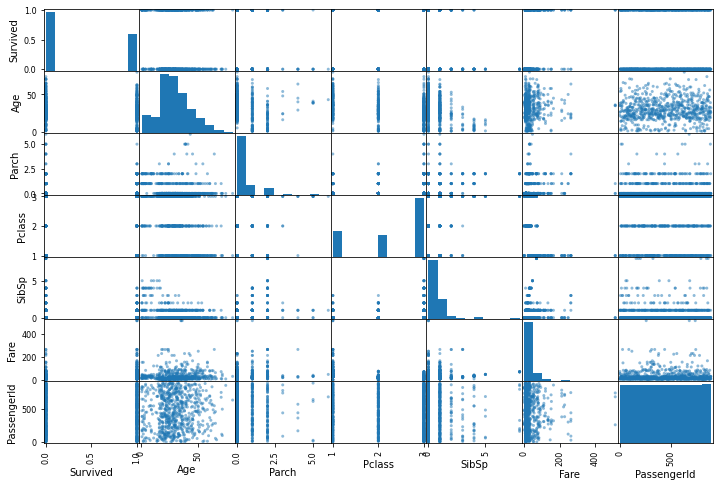

In [19]:
from pandas.plotting import scatter_matrix

attributes = ["Survived", "Age", "Parch", "Pclass", "SibSp", "Fare", "PassengerId"]
scatter_matrix(train_ds[attributes], figsize=(12, 8))

In [20]:
Class3 = train_ds.loc[train_ds.Pclass == 3]['Survived']
rate_3 = sum(Class3)/len(Class3)

print("% of class 3 members who survives: ", rate_3)

% of class 3 members who survives:  0.24236252545824846


In [21]:
Class2 = train_ds.loc[train_ds.Pclass == 2]['Survived']
rate_2 = sum(Class2)/len(Class2)

print("% of class 2 members who survives: ", rate_2)

% of class 2 members who survives:  0.47282608695652173


In [22]:
Class1 = train_ds.loc[train_ds.Pclass == 1]['Survived']
rate_1 = sum(Class1)/len(Class1)

print("% of class 1 members who survives: ", rate_1)

% of class 1 members who survives:  0.6296296296296297


In [23]:
South = train_ds.loc[train_ds.Embarked == 'S']['Survived']
S_rate = sum(South)/len(South)

print("% of people who embarked from Southamptorm: ", S_rate)

% of people who embarked from Southamptorm:  0.33695652173913043


In [24]:
C = train_ds.loc[train_ds.Embarked == 'C']['Survived']
c_rate = sum(C)/len(C)

print("% of people who embarked from Cherbourgh: ", c_rate)

% of people who embarked from Cherbourgh:  0.5535714285714286


In [25]:
Q = train_ds.loc[train_ds.Embarked == 'Q']['Survived']
Qrate = sum(Q)/len(Q)

print("% of people who embarked from Queenstown: ", Qrate)

% of people who embarked from Queenstown:  0.38961038961038963


<AxesSubplot:xlabel='Age', ylabel='Survived'>

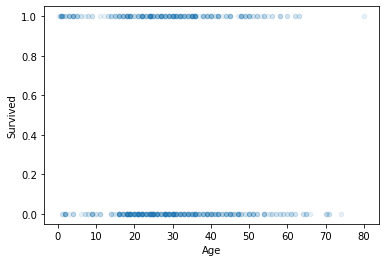

In [26]:
train_ds.plot(kind ="scatter", x="Age", y="Survived", alpha=0.1)

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

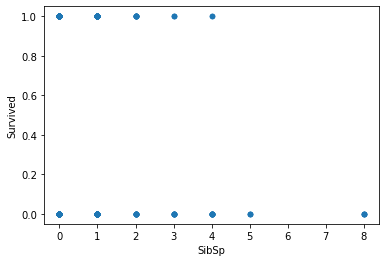

In [27]:
train_ds.plot(kind="scatter", x="SibSp", y="Survived")

Comming up with attribute combinations and testing them

In [28]:
train_ds["sibs_per_fam"] = train_ds["Parch"]/train_ds["SibSp"]
train_ds["family"] = train_ds["SibSp"]/train_ds["Parch"]

In [29]:
corr_mat = train_ds.corr()
corr_mat["Survived"].sort_values(ascending=False)

Survived        1.000000
Fare            0.257307
Parch           0.081629
PassengerId    -0.005007
sibs_per_fam   -0.007132
SibSp          -0.035322
Age            -0.077221
Pclass         -0.338481
family         -0.368222
Name: Survived, dtype: float64

<AxesSubplot:xlabel='family', ylabel='Survived'>

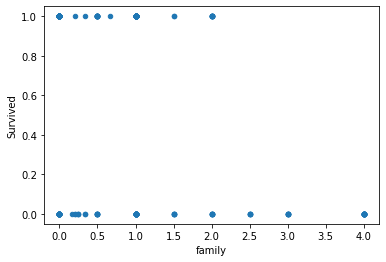

In [30]:
train_ds.plot(kind="scatter", x="family", y="Survived")

# Preparing the Data for Trianing the Model

In [94]:
drop = ["Survived", "Cabin", "Ticket", "sibs_per_fam", "family", "Name", "Fare", "PassengerId", "Embarked", "Age"]
trainx = train_ds.drop(drop, axis=1)
trainy = train_ds["Survived"].copy() 

In [95]:
trainx.head()

,Pclass,Sex,SibSp,Parch
0,3,male,1,0
1,1,female,1,0
2,3,female,0,0
3,1,female,1,0
4,3,male,0,0


In [96]:
trainy.describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [97]:
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X[self.attribute_names].values

In [98]:
sibs, fam = 2, 3
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, family_to_sibs = True):
        self.family_to_sibs = family_to_sibs
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        family = X[:, sibs]/X[:, fam]
        if self.family_to_sibs:
            family_to_sibs = X[:,fam]/X[:,sibs]
            return np.c_[X, family_to_sibs]
        else:
            return np.c_[X, family]

In [99]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
cat_attribs = trainx.select_dtypes(include="object").columns
num_attribs = trainx.select_dtypes(exclude="object").columns

In [100]:
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    #('added', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])


In [101]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])
train_x = full_pipeline.fit_transform(trainx)

In [102]:
train_x

array([[ 0.82737724,  0.43279337, -0.47367361,  0.        ,  1.        ],
       [-1.56610693,  0.43279337, -0.47367361,  1.        ,  0.        ],
       [ 0.82737724, -0.4745452 , -0.47367361,  1.        ,  0.        ],
       ...,
       [ 0.82737724,  0.43279337,  2.00893337,  1.        ,  0.        ],
       [-1.56610693, -0.4745452 , -0.47367361,  0.        ,  1.        ],
       [ 0.82737724, -0.4745452 , -0.47367361,  0.        ,  1.        ]])

# Selecting a Train Model

In [114]:
Xtest = pd.read_csv('/kaggle/input/titanic/test.csv')
features = ["Pclass", "Sex", "SibSp", "Parch"]
X_test = pd.get_dummies(Xtest[features])
tcat_attribs = X_test.select_dtypes(include="object").columns
tnum_attribs = X_test.select_dtypes(exclude="object").columns

In [115]:
xnum_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
])

In [116]:
full_pipeline = ColumnTransformer([
    ("num", xnum_pipeline, tnum_attribs),
    ("cat", cat_pipeline, tcat_attribs),
])
X_test = full_pipeline.fit_transform(X_test)

In [117]:
X_test

array([[3., 0., 0., 0., 1.],
       [3., 1., 0., 1., 0.],
       [2., 0., 0., 0., 1.],
       ...,
       [3., 0., 0., 0., 1.],
       [3., 0., 0., 0., 1.],
       [3., 1., 1., 0., 1.]])

In [130]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(train_x, trainy)
predictions = model.predict(train_x)

In [119]:
from sklearn.metrics import mean_squared_error
rand_mse = mean_squared_error(trainy, predictions)
rand_rmse = np.sqrt(rand_mse)
rand_rmse

0.4303314829119352

In [120]:
from sklearn.tree import DecisionTreeClassifier
tree_reg = DecisionTreeClassifier()
tree_reg.fit(train_x, trainy)
tree_pred = tree_reg.predict(train_x)

In [121]:
tree_mse = mean_squared_error(trainy, tree_pred)
tree_rmse = np.sqrt(tree_mse)
tree_mse

0.1829405162738496

In [131]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, train_x, trainy, scoring = 'neg_mean_squared_error')
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores


array([0.49012597, 0.46204236, 0.44342893, 0.46808239, 0.43704832])

In [132]:
def dis_scores(scores):
    print("Scores:", scores)
    print("Mean", scores.mean())
    print("Standard deviation:", scores.std())

In [133]:
dis_scores(tree_rmse_scores)


Scores: [0.49012597 0.46204236 0.44342893 0.46808239 0.43704832]
Mean 0.46014559405430255
Standard deviation: 0.01885918423654402


In [134]:
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf',random_state=0)
svc.fit(train_x, trainy)
svc_pred = svc.predict(train_x)


In [126]:
svc_scores =cross_val_score(svc, train_x, trainy, scoring = 'neg_mean_squared_error', cv=10)
svc_rmse_score = np.sqrt(-svc_scores)
dis_scores(svc_rmse_score)

Scores: [0.4472136  0.43704832 0.47404546 0.39661489 0.42399915 0.48575205
 0.43704832 0.49718308 0.41053541 0.46204236]
Mean 0.4471482650748733
Standard deviation: 0.030940353020371177


In [135]:
forest_scores =cross_val_score(model, train_x, trainy, scoring = 'neg_mean_squared_error', cv=10)
forest_rmse_score = np.sqrt(-forest_scores)
dis_scores(forest_rmse_score)

Scores: [0.49441323 0.46204236 0.48575205 0.39661489 0.42399915 0.49718308
 0.43704832 0.50835712 0.41053541 0.43704832]
Mean 0.45529939493397575
Standard deviation: 0.03763732640010849


## Hypertuning the models

In [136]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, expon, reciprocal
param_rand = {
    'n_estimators': randint(low=10, high=1000),
    'max_depth': randint(low=1, high=10),
    'random_state': randint(low=0, high=10)
}
rand_search = RandomizedSearchCV(model, param_distributions=param_rand, n_iter=50, cv=5, scoring='neg_mean_squared_error', verbose=2, random_state=42)
rand_search.fit(train_x, trainy)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ......max_depth=7, n_estimators=445, random_state=7; total time=   1.0s
[CV] END ......max_depth=7, n_estimators=445, random_state=7; total time=   1.0s
[CV] END ......max_depth=7, n_estimators=445, random_state=7; total time=   1.0s
[CV] END ......max_depth=7, n_estimators=445, random_state=7; total time=   1.0s
[CV] END ......max_depth=7, n_estimators=445, random_state=7; total time=   1.0s
[CV] END ......max_depth=5, n_estimators=624, random_state=9; total time=   1.3s
[CV] END ......max_depth=5, n_estimators=624, random_state=9; total time=   1.3s
[CV] END ......max_depth=5, n_estimators=624, random_state=9; total time=   1.3s
[CV] END ......max_depth=5, n_estimators=624, random_state=9; total time=   1.3s
[CV] END ......max_depth=5, n_estimators=624, random_state=9; total time=   1.3s
[CV] END ......max_depth=3, n_estimators=224, random_state=7; total time=   0.5s
[CV] END ......max_depth=3, n_estimators=224, r

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_depth=5,
                                                    random_state=1),
                   n_iter=50,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ccf21d46b10>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ccf21d46810>,
                                        'random_state': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ccf20ec2810>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [137]:
rand_search.best_params_

{'max_depth': 3, 'n_estimators': 494, 'random_state': 2}

In [139]:
from sklearn.metrics import accuracy_score
model.score(train_x, trainy)

0.8159371492704826

In [58]:
tree_reg.score(train_x, trainy)

0.936026936026936

In [81]:
svc.score(train_x, trainy)

0.8395061728395061

In [140]:
final = rand_search.best_estimator_
predictions = final.predict(X_test)
output = pd.DataFrame({'PassengerId': Xtest.PassengerId, 'Survived': predictions})
output.to_csv('randomtree.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [69]:
final.score(train_x, trainy)

0.856341189674523

In [61]:
param_tree = {
    'max_depth': randint(low=1, high=10),
    'random_state': randint(low=1, high=10),
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_features': ['sqrt', 'log2', 'auto', None]
}
rand_search = RandomizedSearchCV(tree_reg, param_distributions=param_tree, n_iter=50, cv=5, scoring='neg_mean_squared_error', verbose=2, random_state=42)
rand_search.fit(train_x, trainy)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END criterion=log_loss, max_depth=4, max_features=sqrt, random_state=8; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_features=sqrt, random_state=8; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_features=sqrt, random_state=8; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_features=sqrt, random_state=8; total time=   0.0s
[CV] END criterion=log_loss, max_depth=4, max_features=sqrt, random_state=8; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, random_state=3; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, random_state=3; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, random_state=3; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, random_state=3; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, random_state=3; total time=   0.0

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
65 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
65 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_mes

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=50,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ccf229262d0>,
                                        'max_features': ['sqrt', 'log2', 'auto',
                                                         None],
                                        'random_state': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ccf22926590>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [62]:
negative_mse = rand_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

0.42507111878969805

In [65]:
from sklearn.metrics import accuracy_score
model.score(train_x, trainy)

0.8372615039281706

In [63]:
rand_search.best_params_

{'criterion': 'gini', 'max_depth': 6, 'max_features': None, 'random_state': 4}

In [70]:
final2 = rand_search.best_estimator_
final2.score(train_x, trainy)

0.8518518518518519

In [ ]:
predictions = final2.predict(X)
output = pd.DataFrame({'PassengerId': Xtest.PassengerId, 'Survived': predictions})
output.to_csv('dectree.csv', index=False)
print("Your submission was successfully saved!")

In [89]:
param_tree = {
    'kernel': ['rbf', 'linear', 'sigmoid'],
    'random_state': randint(low=0, high=10)
}
rands_search = RandomizedSearchCV(svc, param_distributions=param_tree, n_iter=50, cv=5, scoring='neg_mean_squared_error', verbose=2, random_state=42)
rands_search.fit(train_x, trainy)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END .....................kernel=sigmoid, random_state=3; total time=   0.0s
[CV] END .....................kernel=sigmoid, random_state=3; total time=   0.0s
[CV] END .....................kernel=sigmoid, random_state=3; total time=   0.0s
[CV] END .....................kernel=sigmoid, random_state=3; total time=   0.0s
[CV] END .....................kernel=sigmoid, random_state=3; total time=   0.0s
[CV] END .........................kernel=rbf, random_state=7; total time=   0.0s
[CV] END .........................kernel=rbf, random_state=7; total time=   0.0s
[CV] END .........................kernel=rbf, random_state=7; total time=   0.0s
[CV] END .........................kernel=rbf, random_state=7; total time=   0.0s
[CV] END .........................kernel=rbf, random_state=7; total time=   0.0s
[CV] END .........................kernel=rbf, random_state=4; total time=   0.0s
[CV] END .........................kernel=rbf, r

RandomizedSearchCV(cv=5, estimator=SVC(random_state=0), n_iter=50,
                   param_distributions={'kernel': ['rbf', 'linear', 'sigmoid'],
                                        'random_state': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ccf20f9d210>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [90]:
rands_search.best_estimator_

SVC(random_state=7)

In [91]:
svc.score(train_x, trainy)

0.8395061728395061

In [92]:
final3 = rands_search.best_estimator_
final3.score(train_x, trainy)

0.8395061728395061

In [93]:

predictions = final3.predict(X_test)
output = pd.DataFrame({'PassengerId': Xtest.PassengerId, 'Survived': predictions})
output.to_csv('svc.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
